In [1]:
import xml.etree.ElementTree as ET

In [2]:
tree = ET.parse('C:/Users/ica/Downloads/final/posts/posts.xml')
root = tree.getroot()

In [3]:
import pandas as pd
from bs4 import BeautifulSoup as soup
import re

first_category = []
second_category = [] 

In [4]:
# extracting text from xml file
for caption in root.iter('photo-caption'):
    section = caption.text
    first_category.append(section)
    sentence = section.split('<p>')
    for s in sentence:
        second_category.append(soup(s).text)      

In [5]:
# this is a function to delete/replace unnecessary html tags
def del_replace(x):
    x = x.replace('\xa0',' ').replace('<p>',' ').replace('\n', ' ').replace\
    ('<br/>',' ').replace('&hellip;',' ').replace('<i>',' ').replace('</i>',' ').replace('&lsquo;',' ').replace('&quot;',' ').\
    replace('</p>',' ').replace('&ldquo;',' ').replace('&rdquo;',' ').replace('&amp;', ' ').replace('<b>','').replace('&rsquo;','').\
    replace('</b>','').replace('&gt;','').replace('&lt;', '').strip()
    return x

In [6]:
from datetime import datetime

# we're going to extract book #, title, author, quotes, and quote numbers info from the xml file
book_num = []
book_title = []
book_author = []
book_date = [] 
book_quotes = []
book = [] 
outliers = []

# book #, title, author, quotes, and quote numbers info from each passage
for i in range(0,194):
    first = first_category[i].split('</p>')
    test = first[0]
    if len(test) > 300:
        list = (test.split('<br/>'))
        test = list[0]
        quotes = del_replace(''.join(list[1:]))
        outliers.append(quotes)
    test = del_replace(test)
    
    if test == '':
        test = first[1]
        test = del_replace(test)
    
    # book number
    pattern_one = re.compile(r'#\d{1,2}')
    matches_one = pattern_one.findall(test)
    if matches_one == []:
        matches_one.append('')
    book_num.append(matches_one)
    # book title(['\''"]?)
    pattern_two = re.compile(r'#\d{1,2}\:?\s\“(.*?)\”')
    matches_two = pattern_two.findall(test)
    if matches_two == []:
        pattern_two_two = re.compile(r'#\d{1,2}\:\s(.*?)\sby')
        matches_two_two = pattern_two_two.findall(test)
        if matches_two_two == []:
            matches_two_two = "Not a book" 
        matches_two = matches_two_two
    book_title.append(matches_two)
    # book author
    pattern_three = re.compile(r'by\s(([A-Z]([a-z]+|\.)\s*){2,3}|(([가-힣]+[ ]*){1,3}))')
    matches_three = pattern_three.findall(test)
    if matches_three == []:
        matches_three.append('No author')
    book_author.append(matches_three[0][0])
    # book date - when i finished reading  
    pattern_four = re.compile(r'\d{1,4}\/\d{1,2}\/\d{1,4}')
    pattern_five = re.compile(r'\d{4}-\d{1,2}-\d{1,2}')
    pattern_six = re.compile(r'\d{1,2}-\d{1,2}-\d{4}')
    matches_four = pattern_four.findall(test)
    matches_five = pattern_five.findall(test)
    matches_six = pattern_six.findall(test)
    # there are three types of date format
    if matches_four == []:
        if matches_six != []:
            for match in matches_six:
                match = datetime.strptime(match, '%m-%d-%Y')
                m = datetime.strftime(match, '%m/%d/%Y')
                book_date.append(m)
        elif matches_five != []:
            for match in matches_five:
                match = datetime.strptime(match, '%Y-%m-%d')
                m = datetime.strftime(match, '%m/%d/%Y')
                book_date.append(m)
        else:
            book_date.append("0")
    else:
        for match in matches_four:
            match = datetime.strptime(match, '%m/%d/%Y')
            m = datetime.strftime(match, '%m/%d/%Y')
            book_date.append(m)
    # book quotes
    book.append(first[1:])

In [7]:
print("Book No.:",len(book_num))
print("Book Title:",len(book_title)) 
print("Book Author:",len(book_author)) 
print("Book Date:",len(book_date)) 
print("Number of Books (Quotes):",len(book))

Book No.: 194
Book Title: 194
Book Author: 194
Book Date: 194
Number of Books (Quotes): 194


In [8]:
import datetime
format_str = '%m/%d/%Y'

df = pd.DataFrame({"Book No": book_num, "Book Title": book_title, "Book Author": book_author, "Book Date": book_date,\
                  "Book Quotes": book})
df['Book Title'] = df['Book Title'].map(lambda x: ''.join(x))
df['Book No'] = df['Book No'].map(lambda x: ''.join(x))
df['Book Quotes'] = df['Book Quotes'].map(lambda x: del_replace(' '.join(x)))
df['Book Date'] = df['Book Date'].astype(str).str.replace('\[|\]|\'', '')
#df['Book Date'] = df['Book Date'].apply(lambda x: datetime.datetime.strptime(x, format_str))
df.head(10)

,Book No,Book Title,Book Author,Book Date,Book Quotes
0,#3,The Rosie Effect,Graeme Simsion,01/12/2019,1. Sex was absolutely not allowed to be sche...
1,#2,David and Goliath,Malcolm Gladwell,01/07/2019,1. We think of underdog victories as improbabl...
2,#1,Start Something That Matters,Blake Mycoskie,01/01/2019,1. We described to them precisely what we want...
3,#80,The Adventures of The Wishing-Chair,Enid Blyton,12/31/2018,1. It was such fun to have a real live pixie t...
4,#79,Creative Confidence,Tom Kelley David,12/30/2018,"1. At its core, creative confidence is about b..."
5,#78,영혼의 미술관,알랭 드 보통,12/29/2018,"1. 예술은 칭송받고 있지만, 그 중요성은 설명의 대상이기보다 추정의 대상이 되는 ..."
6,#77,Committed,Elizabeth Gilbert,12/27/2018,1. [Writers] We write only the books that we n...
7,#76,Milk and Honey,Rupi Kaur,12/26/2018,1. You have sadness / living in places / sadne...
8,#75,The Five People You Meet in Heaven,Mitch Albom,12/25/2018,1. It might seem strange to start a story with...
9,#74,Value Proposition Design,Alex Osterwalder,12/22/2018,1. When you understand how exactly customers m...


In [9]:
len(df.loc[(df['Book Title'] == 'Not a book') & (df['Book No'] != "")])
# 20 books are incorrectly labeled at "Not a book". Serious issue and needs to be fixed.

20

In [10]:
df.loc[(df['Book Title'] == 'Not a book')]

,Book No,Book Title,Book Author,Book Date,Book Quotes
48,,Not a book,N,05/15/2018,1. [san Francisco postcard – feedback] Drunk U...
51,,Not a book,N,05/04/2018,1. [the talk of the town – about facebook] (1...
57,,Not a book,N,04/18/2018,1. [letter from silicon valley] taking the whe...
61,,Not a book,N,04/08/2018,1. [the talk of the town] When it comes to the...
70,,Not a book,N,02/23/2018,1. [television – into the sea] “As we understa...
72,,Not a book,N,02/20/2018,1. [conversation pieces] Her incisive question...
78,,Not a book,N,02/08/2018,1. [the talk of the town - fighting words] A n...
81,#9,Not a book,신현만,02/02/2018,1. 기업의 핵심 중추로 성장한 사람들을 보면 공통적으로 갖추고 있는 무기가 있으니...
82,,Not a book,N,02/01/2018,"1. “From ages eight to eleven, kids are natura..."
83,#2,Not a book,Henry Kissinger,02/01/2018,1. Wilson had guided a country that was new to...


In [11]:
# I fixed the empty 'Book Quotes' for book no #49, book date 9/10/2018. it was a rare glitch
qo = first_category[34].split('<br/>')
qo_str = ''.join(qo[1:])
qo_str = del_replace(qo_str)

In [12]:
df.loc[(df['Book No'] == '#49') & (df['Book Title'] == 'Not a book'), 'Book Quotes'] = qo_str

In [13]:
# There are 5 books that needed manual input for Book Title due to a glitch
df.loc[(df['Book No'] == '#9') & (df['Book Title'] == 'Not a book'), 'Book Title'] = "회사가 붙잡는 사람들의 1% 비밀"
df.loc[(df['Book No'] == '#7') & (df['Book Author'] == 'N'), ['Book Author','Book Title']]\
= ['Klaus Schwab', 'The Fourth Industrial Revolution']
df.loc[(df['Book No'] == '#6') & (df['Book Author'] == 'N'), ['Book Author','Book Title']]\
= ['에이미 모린', '나는 상처받지 않기로 했다']
df.loc[(df['Book No'] == '#4') & (df['Book Title'] == 'Not a book'), 'Book Title'] = "보이지 않는 디자인"

In [14]:
# For "Diplomacy by Henry Kissinger", I will be combining the rows (n=16) to make it into one single row 
henry = df.loc[(df['Book No'] == '#2') & (df['Book Title'] == 'Not a book')]
henry_quotes = henry['Book Quotes'].str.cat(sep=' ')
new_henry = pd.DataFrame([['#2', 'Diplomacy', 'Henry Kissinger', '02/01/2018', henry_quotes]], columns=['Book No', 'Book Title', 'Book Author', 'Book Date', 'Book Quotes'])
df = df.append(new_henry, ignore_index=True)
df.loc[(df['Book No'] == '#2')]
df = df[df['Book Title'] != 'Not a book']

In [15]:
# These were 5 glitches where Book Authors were incorrect / Not Books but articles from The New Yorker (irrelavant data)
df.loc[df['Book Author'] == 'N'] 

,Book No,Book Title,Book Author,Book Date,Book Quotes
44,#39,기억을 파는 남자,N,06/03/2018,"1. ‘도라, 매미의 강을 위한 위로 - 당대 최고의 히트곡’ 이라는 촌스러운 활자..."
49,#35,세상 모든 CEO가 묻고 싶은 질문들,N,05/13/2018,1. 조직 문제를 쉽고 빨리 해결하려면 원인 분석을 하는 데 시간을 낭비할 것이 아...
135,#59,여자의 모든 인생은 20대에 결정된다,N,12/05/2017,1. 인생은 선택의 연속이다. 그 선택들이 모여 한 사람의 인생의 틀을 만들어 준다...
159,#35,The Course of Love,N,09/10/2017,1. The whole incident is negligible. They are ...
165,#29,The Picture of Dorian Gray,N,08/04/2017,"1. ‘Harry,’ said Basil Hallward, looking him s..."


In [16]:
df.loc[(df['Book No'] == '#39') & (df['Book Author'] == 'N'), 'Book Author'] = "두제 에두아르두 아구아루사"
df.loc[(df['Book No'] == '#35') & (df['Book Author'] == 'N'), 'Book Author'] = "IGM 세계 경영 연구원"
df.loc[(df['Book No'] == '#59') & (df['Book Author'] == 'N'), 'Book Author'] = "남인숙"
df.loc[(df['Book No'] == '#35') & (df['Book Title'] == 'The Course of Love'), 'Book Author'] = "Alain de Botton"
df.loc[(df['Book No'] == '#29') & (df['Book Author'] == 'N'), 'Book Author'] = "Oscar Wilde"

In [17]:
# 15 were 'Not Books' but articles from The New Yorker magazine
# We are dropping these from our dataframe
the_new_yorker = df.loc[df['Book Author'] == 'N']
df = df[df['Book Author'] != 'N'] 

In [18]:
# There are 22 books with no book dates
df.loc[df['Book Date'] == '0']

,Book No,Book Title,Book Author,Book Date,Book Quotes
147,#47,대통령 보고서,노무현 대통령비서실 보고서,0,1. ‘보고서 작성능력’은 효율적인 의사소통과 업무생산성 향상에 필수적인 요소다. ...
152,#42,“나만 알고싶은 유럽 TOP10″,정여울,0,1. 당신이 무엇을 수확했는가에 따라 하루하루를 판가름하지 말라. 당신이 어떤 씨...
157,#37,맥킨지 문제 해결의 기술,오마에 겐이치 사이토,0,1. 그러나 도전하지 않으면 문제는 절대로 해결되지 않는다. 나이키사의 필 나이트 ...
176,#18,라오스에 대체 뭐가 있는데요?,무라카미 하루키,0,"1. “흥, 고작 마라톤 경주에 결의된 개념을 부여한다는 게 말이돼?”라고 당신은 ..."
192,#2,사피엔스,유발 하라리,0,1. 호모 사피엔스가 세상을 정복한 것은 다른 무엇보다도 우리에게만 있는 고유한 언...


In [19]:
# 사피엔스, 유발 하라리 between 4/2/2017 and 4/9/2017 
df.loc[(df['Book No'] == '#2') & (df['Book Author'] == '유발 하라리'), 'Book Date'] = '4/5/2017'
# 라오스에 대체 뭐가 있는데요?, 무라카미 하루키 between 6/17/2017 and 6/25/2017
df.loc[(df['Book No'] == '#18') & (df['Book Title'] == '라오스에 대체 뭐가 있는데요?'), 'Book Date'] = '6/21/2017'
# 맥킨지 문제 해결의 기술, 오마에 겐이치 사이토 between 9/12/2017 and 9/25/2017
df.loc[(df['Book No'] == '#37') & (df['Book Title'] == '맥킨지 문제 해결의 기술'), 'Book Date'] = '9/18/2017'
# “나만 알고싶은 유럽 TOP10″, 정여울 between 11/05/2017 and 11/14/2017
df.loc[(df['Book No'] == '#42') & (df['Book Title'] == '“나만 알고싶은 유럽 TOP10″'), 'Book Date'] = '11/10/2017'
# 대통령 보고서, 노무현 대통령비서실 보고서 between 11/23/2017 and 11/25/2017
df.loc[(df['Book No'] == '#47') & (df['Book Title'] == '대통령 보고서'), 'Book Date'] = '11/24/2017'

In [20]:
df['Book Date'] = pd.to_datetime(df['Book Date'])
df = df.sort_values('Book Date', ascending=False)

In [21]:
book_year = df['Book Date'].apply(lambda x: pd.to_datetime(x).strftime('%Y'))
df['Date Year'] = pd.DataFrame(book_year)
df = df.reset_index(drop=True)

In [22]:
df.loc[df['Book Quotes'] == '']
# Two books didn't have quotes inserted correctly due to different html tags. 
df.loc[(df['Book No'] == '#49') & (df['Book Title'] == '알레프'), 'Book Quotes'] = outliers[0]
df.loc[(df['Book No'] == '#37') & (df['Book Title'] == 'Life'), 'Book Quotes'] = outliers[1]
# one of the books, 실컷 울어도 되는 밤 by 헨 킴 was an illustration book and therefore didn't have any quotes
df.drop(index=81, inplace=True)
df = df.reset_index(drop=True)
df.loc[(df['Book No'] == '#37')]

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year
46,#37,Life,Paulo Coelho,2018-05-17,1. A search always starts with Beginner’s Luck...,2018
126,#37,맥킨지 문제 해결의 기술,오마에 겐이치 사이토,2017-09-18,1. 그러나 도전하지 않으면 문제는 절대로 해결되지 않는다. 나이키사의 필 나이트 ...,2017


In [23]:
book_quotes = []
for i in range(0, 163):
    x = df['Book Quotes'][i]
    pattern_seven = re.compile(r'\d{1,2}\.')
    matches_seven = pattern_seven.findall(x)
    result = len(matches_seven)
    book_quotes.append(result)
    
book_quotes
df['Quote Num'] = pd.DataFrame(book_quotes)

In [24]:
df.loc[df['Book Title'] == 'Getting More']
# For "Getting More" by Stuart Diamond, I had written a personal note in the beginning, which is irrelavant for this purpose.
more_quote = df['Book Quotes'][158]
# without the personal note
more_quote = more_quote[234:]
df.loc[(df['Book No'] == '#5') & (df['Book Title'] == 'Getting More'), 'Book Quotes'] = more_quote

In [25]:
# I only want to analyze books from 2017-2018, so we will drop the 3 books from 2019.
df = df.drop(df.index[:3]).reset_index(drop=True)

In [26]:
df['Book Quotes'] = df['Book Quotes'].apply(lambda x: x.replace('“', '').replace('”',''))
df['Book Title'] = df['Book Title'].apply(lambda x: x.replace('“', '').replace('”','').replace('″','').strip())
df['Book Quotes'] = df['Book Quotes'].str.replace('\d+', '')
df['Book Quotes'] = df['Book Quotes'].apply(lambda x: x[2:])

df

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num
0,#80,The Adventures of The Wishing-Chair,Enid Blyton,2018-12-31,It was such fun to have a real live pixie to p...,2018,7
1,#79,Creative Confidence,Tom Kelley David,2018-12-30,"At its core, creative confidence is about beli...",2018,12
2,#78,영혼의 미술관,알랭 드 보통,2018-12-29,"예술은 칭송받고 있지만, 그 중요성은 설명의 대상이기보다 추정의 대상이 되는 경우가...",2018,17
3,#77,Committed,Elizabeth Gilbert,2018-12-27,[Writers] We write only the books that we need...,2018,13
4,#76,Milk and Honey,Rupi Kaur,2018-12-26,You have sadness / living in places / sadness ...,2018,9
5,#75,The Five People You Meet in Heaven,Mitch Albom,2018-12-25,It might seem strange to start a story with an...,2018,13
6,#74,Value Proposition Design,Alex Osterwalder,2018-12-22,When you understand how exactly customers meas...,2018,17
7,#73,레이시 이야기,스티브 마틴,2018-12-19,"레이시가 소더비에 자리 잡아가는 과정은, 잔잔한 배경에 은근히 도드라지는 사악한 디...",2018,12
8,#72,Business Model Generation,Alexander Osterwalder Yves,2018-12-17,A business model describes the rationale of ho...,2018,20
9,#71,세계일주를 꿈꾸는 당신에게,최효석,2018-12-15,사실 장기여행을 마치고 돌아온 사람들의 공통적인 특징 중의 하나가 바로 이타적인 인...,2018,22


In [27]:
# Hypothesis 1: I read most in December, probably trying to make sure that i read 80 books by the end of the year.
# Hypothesis 2: Books with more than 10 quotes have positive sentiment. ("more quotes, more positive")
# Hypothesis 3: The highest sentiment score will be a Korean book. (I believe I tend to read more self-help books in Korean)

In [28]:
# Hypothesis 1: I read most in December, probably trying to make sure that i read 80 books by the end of the year.
print("2018 December:", len(df[(df['Book Date'] > '2018-12-01') & (df['Book Date'] < '2018-12-31')]), "books,", 12/80*100, '% of 80 books read')
print("2017 December:", len(df[(df['Book Date'] > '2017-12-01') & (df['Book Date'] < '2017-12-31')]), "books,", 26/80*100, '% of 80 books read')

2018 December: 12 books, 15.0 % of 80 books read
2017 December: 26 books, 32.5 % of 80 books read


C:\Users\ica\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ica\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


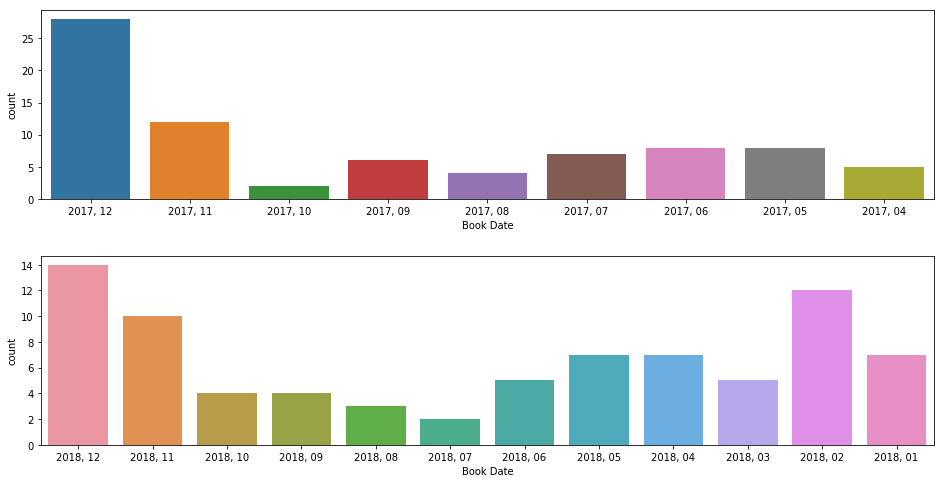

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
year_2018 = df.loc[df['Date Year'] == '2018']
fig, axes = plt.subplots(2,1, figsize=(16,8))
plt.subplots_adjust(hspace = 0.3)
year_2018['Book Date'] = pd.to_datetime(year_2018['Book Date']).dt.strftime('%Y, %m')
sns.countplot(year_2018['Book Date'], ax=axes[1])

year_2017 = df.loc[df['Date Year'] == '2017']
year_2017['Book Date'] = pd.to_datetime(year_2017['Book Date']).dt.strftime('%Y, %m')
sns.countplot(year_2017['Book Date'], ax=axes[0])
plt.show()

In [30]:
# Hypothesis 2: Books with more than 10 quotes have positive sentiment. ("more quotes, more positive")

C:\Users\ica\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ica\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


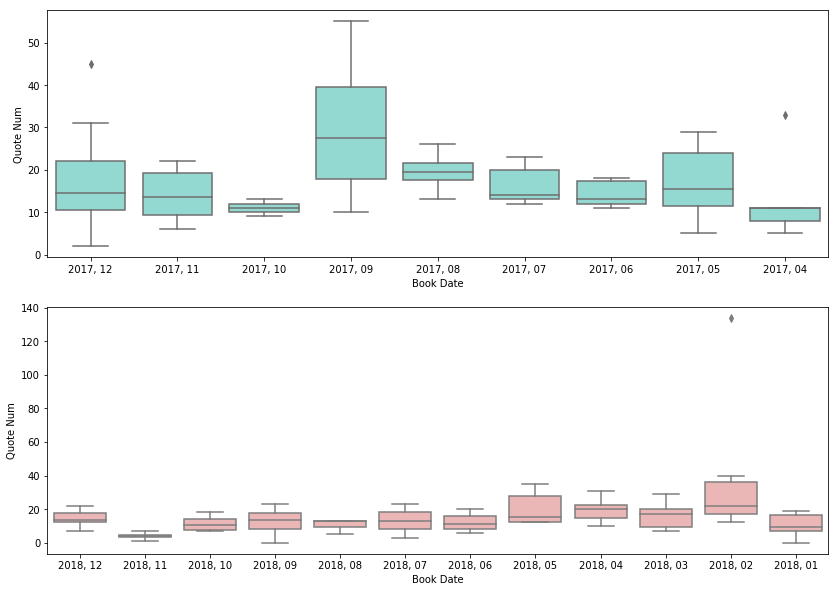

In [31]:
# this is the boxplot of number of quotes per book in each book.
year_2018 = df.loc[df['Date Year'] == '2018']
fig, axes = plt.subplots(2,1, figsize=(14,10))
year_2018['Book Date'] = pd.to_datetime(year_2018['Book Date']).dt.strftime('%Y, %m')
sns.boxplot(x = year_2018['Book Date'], y = year_2018['Quote Num'], ax=axes[1], color='#f4adad')

year_2017 = df.loc[df['Date Year'] == '2017']
year_2017['Book Date'] = pd.to_datetime(year_2017['Book Date']).dt.strftime('%Y, %m')
sns.boxplot(x = year_2017['Book Date'], y = year_2017['Quote Num'], ax=axes[0], color='#87e5da')
plt.show()

In [32]:
df['Book Quotes'] = df['Book Quotes'].apply(lambda x: x.replace('[','').replace(']',''))
df

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num
0,#80,The Adventures of The Wishing-Chair,Enid Blyton,2018-12-31,It was such fun to have a real live pixie to p...,2018,7
1,#79,Creative Confidence,Tom Kelley David,2018-12-30,"At its core, creative confidence is about beli...",2018,12
2,#78,영혼의 미술관,알랭 드 보통,2018-12-29,"예술은 칭송받고 있지만, 그 중요성은 설명의 대상이기보다 추정의 대상이 되는 경우가...",2018,17
3,#77,Committed,Elizabeth Gilbert,2018-12-27,Writers We write only the books that we need t...,2018,13
4,#76,Milk and Honey,Rupi Kaur,2018-12-26,You have sadness / living in places / sadness ...,2018,9
5,#75,The Five People You Meet in Heaven,Mitch Albom,2018-12-25,It might seem strange to start a story with an...,2018,13
6,#74,Value Proposition Design,Alex Osterwalder,2018-12-22,When you understand how exactly customers meas...,2018,17
7,#73,레이시 이야기,스티브 마틴,2018-12-19,"레이시가 소더비에 자리 잡아가는 과정은, 잔잔한 배경에 은근히 도드라지는 사악한 디...",2018,12
8,#72,Business Model Generation,Alexander Osterwalder Yves,2018-12-17,A business model describes the rationale of ho...,2018,20
9,#71,세계일주를 꿈꾸는 당신에게,최효석,2018-12-15,사실 장기여행을 마치고 돌아온 사람들의 공통적인 특징 중의 하나가 바로 이타적인 인...,2018,22


In [33]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

def remove_punctuation(text):
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [34]:
df['Book Quotes'] = df['Book Quotes'].apply(remove_punctuation)
df.head(5)

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num
0,#80,The Adventures of The Wishing-Chair,Enid Blyton,2018-12-31,It was such fun to have a real live pixie to p...,2018,7
1,#79,Creative Confidence,Tom Kelley David,2018-12-30,At its core creative confidence is about belie...,2018,12
2,#78,영혼의 미술관,알랭 드 보통,2018-12-29,예술은 칭송받고 있지만 그 중요성은 설명의 대상이기보다 추정의 대상이 되는 경우가 ...,2018,17
3,#77,Committed,Elizabeth Gilbert,2018-12-27,Writers We write only the books that we need t...,2018,13
4,#76,Milk and Honey,Rupi Kaur,2018-12-26,You have sadness living in places sadness sh...,2018,9


In [35]:
sw = stopwords.words('english')

def stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

df['Book Quotes'] = df['Book Quotes'].apply(stopwords)
df.head(5)

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num
0,#80,The Adventures of The Wishing-Chair,Enid Blyton,2018-12-31,fun real live pixie play mollie peter went pla...,2018,7
1,#79,Creative Confidence,Tom Kelley David,2018-12-30,core creative confidence believing ability cre...,2018,12
2,#78,영혼의 미술관,알랭 드 보통,2018-12-29,예술은 칭송받고 있지만 그 중요성은 설명의 대상이기보다 추정의 대상이 되는 경우가 ...,2018,17
3,#77,Committed,Elizabeth Gilbert,2018-12-27,writers write books need write able write must...,2018,13
4,#76,Milk and Honey,Rupi Kaur,2018-12-26,sadness living places sadness shouldn’t live e...,2018,9


In [36]:
# create an object of lemmatizing function
lemmatizer = WordNetLemmatizer()

def lemmatize(text):    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

df['Book Quotes'] = df['Book Quotes'].apply(lemmatize)
df.head(5)

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num
0,#80,The Adventures of The Wishing-Chair,Enid Blyton,2018-12-31,fun real live pixie play mollie peter went pla...,2018,7
1,#79,Creative Confidence,Tom Kelley David,2018-12-30,core creative confidence believing ability cre...,2018,12
2,#78,영혼의 미술관,알랭 드 보통,2018-12-29,예술은 칭송받고 있지만 그 중요성은 설명의 대상이기보다 추정의 대상이 되는 경우가 ...,2018,17
3,#77,Committed,Elizabeth Gilbert,2018-12-27,writer write book need write able write must r...,2018,13
4,#76,Milk and Honey,Rupi Kaur,2018-12-26,sadness living place sadness shouldn’t live ev...,2018,9


In [37]:
from textblob import TextBlob

def detect_polarity(text):
    t = TextBlob(text)
    return t.sentiment.polarity

df['Polarity'] = df['Book Quotes'].apply(detect_polarity)
df.sort_values('Polarity')

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num,Polarity
64,#16,부자들의 생각법,하노 벡,2018-02-19,시장은 그야말로 너무 인간적이었기 때문이다 합리적으로 움질일 것 같지만 결코 합리적...,2018,18,-0.312500
0,#80,The Adventures of The Wishing-Chair,Enid Blyton,2018-12-31,fun real live pixie play mollie peter went pla...,2018,7,-0.093405
38,#42,플레이팅의 기술,Machiyama Chiho,2018-06-23,맛은 요리의 맛과 먹는 사람의 심리상태 먹는 공간 그리고 지금까지 쌓아온 그 사람의...,2018,16,-0.075000
148,#12,생각과 자료를 완벽하게 정리하는 보고서의 신,박경수,2017-05-23,보고서 작성은 논리적으로 생각을 전달하기 위한 하나의 연습일 뿐이다 실전은 언제 어...,2017,13,-0.050000
98,#62,어떻게 인생을 살 것인가,쑤린,2017-12-07,하버드의 내로라하는 인사들의 성공 궤적을 짚어가다 보면 그들의 성공이 지극히 필연적...,2017,31,0.000000
95,#65,경영의 모험,존 브룩스,2017-12-13,대부분의 경영 전략은 실패한다 마이클 포터 하버드 경영대학원 교수의 말이다 오늘날 ...,2017,20,0.000000
92,#68,협상의 비법,로저 도슨,2017-12-17,파워 영업 협상가는 상대가 이겼다고 생각하게 한다 무능한 협상가는 상대가 졌다고 생...,2017,28,0.000000
90,#70,나를 바꾸는 심리학의 지혜: 프레임,최인철,2017-12-19,건물 어느 곳에 창을 내더라도 그 창만큼의 세상을 보게 되듯이 우리도 프레임이라는 ...,2017,22,0.000000
88,#72,더 퓨처,쑤옌,2017-12-21,현실의 조건이나 상태에 입각해 사고하고 행동하는 사람은 현실주의자이다 그런데 현실을...,2017,22,0.000000
87,#73,멀티플라이어,리즈 와이즈먼 그렉,2017-12-23,비록 천부적인 재능을 타고나지 않은 평범한 사람도 양질의 교육과정과 특별한 만남을 ...,2017,24,0.000000


In [38]:
# There are 120 books with more than 10 quotes. 
# - - - (tbc) Only 52 books have positive sentiments and more than 10 quotes.
# The book with the most quotes did not have the highest sentiment score, therefore proving my second hypothesis wrong.
df.loc[(df['Quote Num']>=10) & (df['Polarity']>0)].sort_values('Quote Num', ascending=False)

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num,Polarity
72,#2,Diplomacy,Henry Kissinger,2018-02-01,wilson guided country new international affair...,2018,134,0.046020
48,#32,Good to Great,Jim Collins,2018-05-01,good enemy great company culture company disci...,2018,35,0.172485
45,#35,세상 모든 CEO가 묻고 싶은 질문들,IGM 세계 경영 연구원,2018-05-13,조직 문제를 쉽고 빨리 해결하려면 원인 분석을 하는 데 시간을 낭비할 것이 아니라 ...,2018,34,0.432500
155,#5,Getting More,Stuart Diamond,2017-04-29,event broken deconstructed essential element w...,2017,33,0.103854
153,#7,The Fourth Industrial Revolution,Klaus Schwab,2017-05-05,profound uncertainty surrounding development a...,2017,29,0.137925
83,#77,Mandela’s Way,Richard Stengel,2017-12-27,nelson mandel man many contradiction thickskin...,2017,29,0.162007
127,#33,Change by Design,Tim Brown,2017-09-04,design thinking tap capacity overlooked conven...,2017,26,0.199222
128,#32,Linchpin,Seth Godin,2017-08-31,internalize industrial model one myriad interc...,2017,26,0.184585
152,#8,Big Magic,Elizabeth Gilbert,2017-05-08,like rare orchid bloom separated many year cre...,2017,23,0.110212
28,#52,The Subtle Art of Not Giving a Fuck,Mark Manson,2018-09-29,there’s saying texas smallest dog bark loudest...,2018,23,0.014481


In [39]:
# Hypothesis 3: The highest sentiment score will be a Korean book. (I believe I tend to read more self-help books in Korean)

In [40]:
# There are 59 books with positive sentiments.
# The highest polarity was by a Korean book, which proved my third hypothesis right.
# However, it was only because the book contained some English words. Other Korean books did not pass the sentiment analysis.
# 
df.loc[df['Polarity'] > 0].sort_values('Polarity', ascending=False)

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num,Polarity
65,#15,협상의 10계명,전성철 최철규,2018-02-17,협상은 예술이 아니라 과학이라는 것을 다시 말해 협상에는 일정한 원리가 있다는 것을...,2018,21,0.540000
45,#35,세상 모든 CEO가 묻고 싶은 질문들,IGM 세계 경영 연구원,2018-05-13,조직 문제를 쉽고 빨리 해결하려면 원인 분석을 하는 데 시간을 낭비할 것이 아니라 ...,2018,34,0.432500
122,#38,Her,Pierre Alex Jeanty,2017-09-25,looking man devote le time questioning wall ar...,2017,15,0.273750
147,#13,The Secret,Rhonda Byrne,2017-05-29,creation always happening every time individua...,2017,15,0.273260
150,#10,누구나 할 수 있는 인포그래픽 파워포인트,곽승원,2017-05-11,정보를 찾기는 쉬워졌지만 분류하고 필요 없는 것을 제외하는 데 더 많은 시간을 보내...,2017,5,0.258333
53,#27,The INFJ Personality Guide,Bo Miller,2018-04-14,fact break infj work formula would look like p...,2018,18,0.256824
114,#46,The Perks of Being a Wallflower,Stephen Chbosky,2017-11-23,need know someone listens understands doesn’t ...,2017,10,0.254772
27,#53,Good to Great,Jim Collins,2018-10-08,level leader study duality modest willful humb...,2018,18,0.246560
115,#45,Work Rules,Laszlo Bock,2017-11-20,russian novelist leo tolstoy wrote happy famil...,2017,14,0.209743
81,#79,Steal Like An Artist,Austin Kleon,2017-12-29,immature poet imitate mature poet steal bad po...,2017,15,0.207789


In [41]:
# 97 books had '0' sentiment score, and all of them were Korean books. 
# This means that I should translate the quotes into English for a more fair and accurate prediction. 
df.loc[df['Polarity'] == 0]

,Book No,Book Title,Book Author,Book Date,Book Quotes,Date Year,Quote Num,Polarity
2,#78,영혼의 미술관,알랭 드 보통,2018-12-29,예술은 칭송받고 있지만 그 중요성은 설명의 대상이기보다 추정의 대상이 되는 경우가 ...,2018,17,0.0
7,#73,레이시 이야기,스티브 마틴,2018-12-19,레이시가 소더비에 자리 잡아가는 과정은 잔잔한 배경에 은근히 도드라지는 사악한 디테...,2018,12,0.0
9,#71,세계일주를 꿈꾸는 당신에게,최효석,2018-12-15,사실 장기여행을 마치고 돌아온 사람들의 공통적인 특징 중의 하나가 바로 이타적인 인...,2018,22,0.0
11,#69,내 인생 내 뜻대로 사는 용기,로버트 앨버티,2018-12-08,진정한 강인함이란 자신의 모습을 그대로 받아들일 수 있는 것이다 ‘나약함’을 부정하...,2018,10,0.0
12,#68,솔로이스트,스티브 로페즈,2018-12-05,화제는 그러다가도 계속해서 음악 이야기로 돌아왔다 유일한 삶의 목적이 머릿속에 흩어...,2018,21,0.0
13,#67,하버드 새벽 4시반,웨이슈잉,2018-12-01,하버드에서는 이런 남는 시간의 활동이 자신으 ㅣ삶의 질을 다르게 만든다고 믿는다 하...,2018,18,0.0
14,#66,해리포터: 죽음의 성물 4,J. K. Rowling,2018-11-26,애들 몇 명쯤 줄든 늘든 그게 뭔 차이가 있겠어 진실과 거짓 용기와 비겁함의 차이뿐...,2018,4,0.0
15,#65,해리포터: 죽음의 성물 3,J.K. Rowling,2018-11-24,하지만 일반적으로 지팡이가 다른 사람 손으로 넘어가면 지팡이의 충성심도 변하게 되어...,2018,3,0.0
16,#64,해리포터: 죽음의 성물 2,J. K. Rowling,2018-11-21,볼드모트는 아주 영리하게 게임을 하고 있단다 자신의 정체를 드러내면 공개적인 반란을...,2018,3,0.0
17,#63,해리포터: 죽음의 성물 1,J. K. Rowling,2018-11-21,해리는 덤블도어 역시 어린 시절이나 청년 시절을 보냈을 거라는 상상을 단 한 번도 ...,2018,5,0.0
